# Assignment for Week 7 MLDS
by Eva Aßmann, Paul Vogler

In [0]:
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from matplotlib import pyplot
from pandas import DataFrame
from scipy.spatial import voronoi_plot_2d, Voronoi
from scipy.cluster.hierarchy import dendrogram
from itertools import cycle, islice
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Generate Data

## Non-Cluster Data

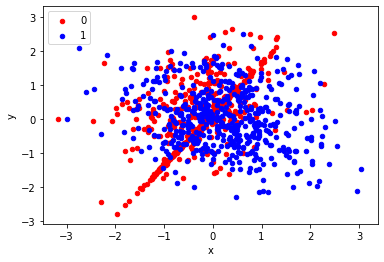

In [2]:
X_no_cluster,y_no_cluster = make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0, n_repeated=0, n_classes=2, n_clusters_per_class=2,class_sep=0.3,flip_y=0,weights=[0.5,0.5], random_state=2)
# scatter plot, dots colored by class value
df_no_cluster = DataFrame(dict(x=X_no_cluster[:,0], y=X_no_cluster[:,1], label=y_no_cluster))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_no_cluster.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
pyplot.show()

## Non-Spherical Data

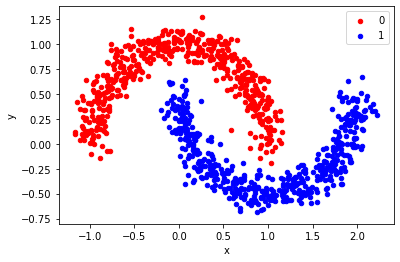

In [3]:
# generate 2d classification dataset
X_moon, y_moon = make_moons(n_samples=1000, noise=0.1)
# scatter plot, dots colored by class value
df_moon = DataFrame(dict(x=X_moon[:,0], y=X_moon[:,1], label=y_moon))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df_moon.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
pyplot.show()

## Many Clusters close to each other

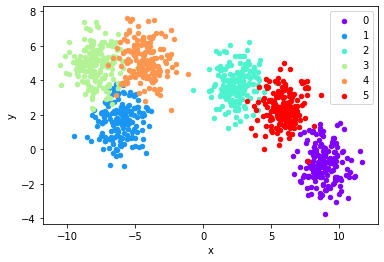

In [4]:
# generate 2d classification dataset
centers = 6
X_clusters, y_clusters = make_blobs(n_samples=1000, centers=centers, n_features=2, random_state=37)
# scatter plot, dots colored by class value
df_clusters = DataFrame(dict(x=X_clusters[:,0], y=X_clusters[:,1], label=y_clusters))
fig, ax = pyplot.subplots()
grouped = df_clusters.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, centers))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
pyplot.show()

## Different Cluster Sizes

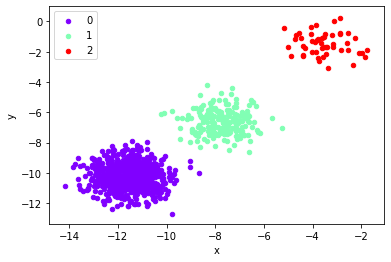

In [5]:
X_1, _ = make_blobs(n_samples=750, n_features=2, centers=1, center_box=(-12,-10), cluster_std=.8, random_state=5)
X_2, _ = make_blobs(n_samples=200, n_features=2, centers=1, center_box=(-8,-6), cluster_std=.8, random_state=12)
X_3, _ = make_blobs(n_samples=50, n_features=2, centers=1, center_box=(-4,0), cluster_std=.8, random_state=43)
X_sizes = np.concatenate((X_1, X_2, X_3), axis=0)
y_sizes = [0]*750 + [1]*200 + [2]*50
# scatter plot, dots colored by class value
df_sizes = DataFrame(dict(x=X_sizes[:,0], y=X_sizes[:,1], label=y_sizes))
fig, ax = pyplot.subplots()
grouped = df_sizes.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
pyplot.show()

## Different Cluster Densities

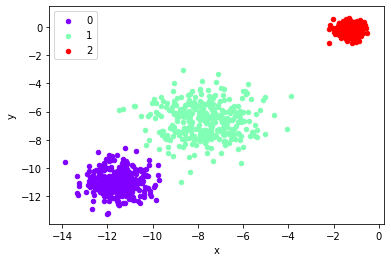

In [6]:
X_1, _ = make_blobs(n_samples=333, n_features=2, centers=1, center_box=(-12,-10), cluster_std=.8, random_state=16)
X_2, _ = make_blobs(n_samples=333, n_features=2, centers=1, center_box=(-8,-6), cluster_std=1.2, random_state=12)
X_3, _ = make_blobs(n_samples=334, n_features=2, centers=1, center_box=(-4,0), cluster_std=.3, random_state=87)
X_densities = np.concatenate((X_1, X_2, X_3), axis=0)
y_densities = [0]*333 + [1]*333 + [2]*334
# scatter plot, dots colored by class value
df_densities = DataFrame(dict(x=X_densities[:,0], y=X_densities[:,1], label=y_densities))
fig, ax = pyplot.subplots()
grouped = df_densities.groupby('label')
colors = cm.rainbow(np.linspace(0, 1, 3))
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=[colors[key]])
pyplot.show()

# k-Means Clustering

## Determine best k (visual):<br>

* k=2 for "Non-Cluster"
* k=2 for "Non-Spherical"
* k=6 for "Many Clusters"
* k=3 for "different Sizes"
* k=3 for "different Densities"

## Determine best k  (elbow method):
If the Sum of squared distances plot looks like an arm, then the elbow on the arm is optimal k.

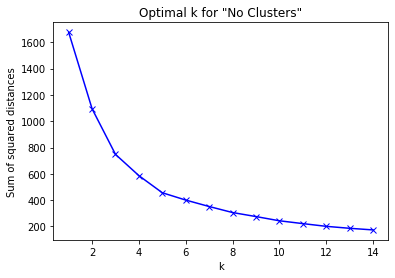

In [7]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_no_cluster)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k for "No Clusters"')
plt.show()
# 'elbow' at k=3 or 5? set to 5

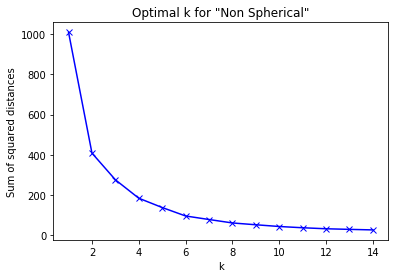

In [8]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_moon)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k for "Non Spherical"')
plt.show()
# 'elbow' at k=4

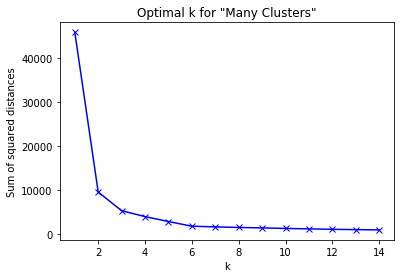

In [9]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_clusters)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k for "Many Clusters"')
plt.show()
# 'elbow' at k=3

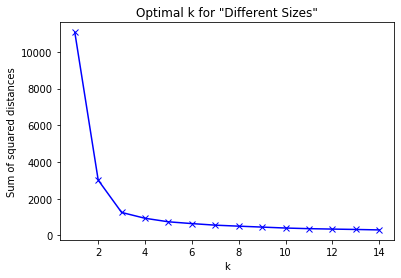

In [10]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_sizes)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k for "Different Sizes"')
plt.show()
# 'elbow' at k=3

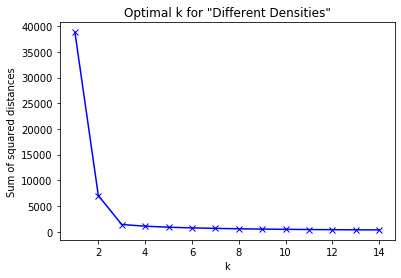

In [11]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X_densities)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Optimal k for "Different Densities"')
plt.show()
# 'elbow' at k=3

## Visualize Non-Cluster clustering results

In [0]:
def plot_boundaries(X, n_clusters):
  kmeans = KMeans(n_clusters=n_clusters)
  kmeans.fit(X)
  y_kmeans = kmeans.predict(X)
  # Step size of the mesh. Decrease to increase the quality of the VQ.
  h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

  # Obtain labels for each point in mesh. Use last trained model.
  Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

  # Put the result into a color plot
  Z = Z.reshape(xx.shape)
  plt.figure(1)
  plt.clf()
  plt.imshow(Z, interpolation='nearest',
         extent=(xx.min(), xx.max(), yy.min(), yy.max()),
         cmap=plt.cm.Paired,
         aspect='auto', origin='lower')

  plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
  # Plot the centroids as a white X
  centroids = kmeans.cluster_centers_
  plt.scatter(centroids[:, 0], centroids[:, 1],
          marker='x', s=169, linewidths=3,
          color='w', zorder=10)
  plt.xlim(x_min, x_max)
  plt.ylim(y_min, y_max)
  plt.xticks(())
  plt.yticks(())
  plt.show()

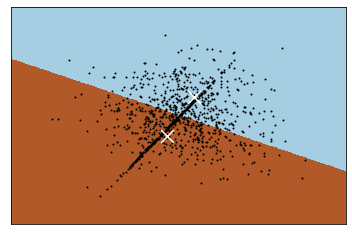

In [13]:
# (visual) k=2
plot_boundaries(X_no_cluster, n_clusters=2)

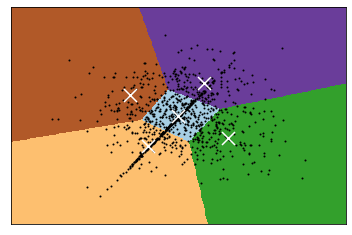

In [14]:
# (elbow) k=5
plot_boundaries(X_no_cluster, 5)

## Visualize Non-Spherical clustering results

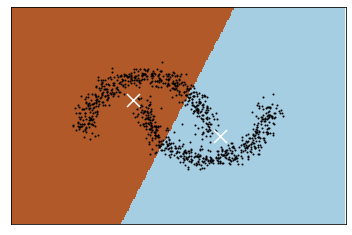

In [15]:
# (visual) k=2
plot_boundaries(X_moon, 2)

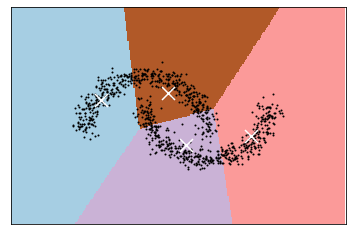

In [16]:
# (elbow) k=4
plot_boundaries(X_moon, 4)

## Visualize many clusters clustering results

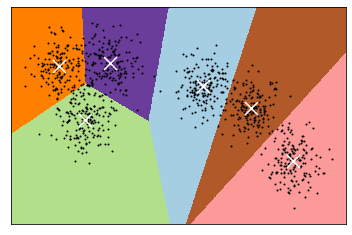

In [17]:
# (visual) k=5
plot_boundaries(X_clusters, 6)

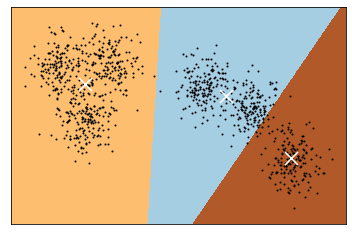

In [18]:
# (elbow) k=3
plot_boundaries(X_clusters, 3)

## Visualize different cluster sizes clustering results

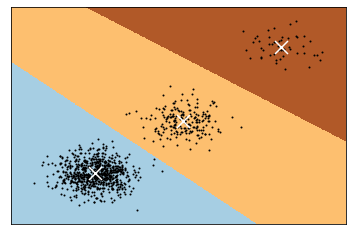

In [19]:
# (visual) and (elbow) k=3
plot_boundaries(X_sizes, 3)

## Visualize different cluster densities clustering results

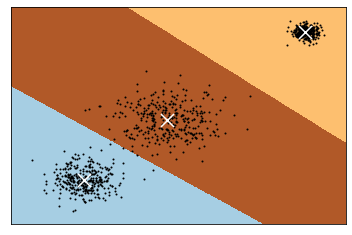

In [20]:
# (visual) and (elbow) k=3
plot_boundaries(X_densities, 3)

# Hierarchical Clustering
using the number of clusters from the elbow method

In [0]:
def plot_hierarchical(X, n_clusters, method):
  clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
  clustering.fit(X)
  y_pred = clustering.labels_.astype(np.int)
  colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a', 
                                       '#f781bf', '#a65628', '#984ea3',
                                       '#999999', '#e41a1c', '#dede00']),
                                int(max(y_pred) + 1))))
  plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])
  plt.xticks(())
  plt.yticks(())
  plt.show()

## Visualize Non-Cluster clustering results

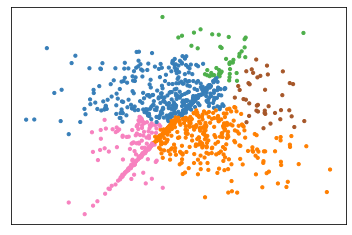

In [22]:
# complete or maximum linkage
plot_hierarchical(X_no_cluster, n_clusters=5, method="complete")

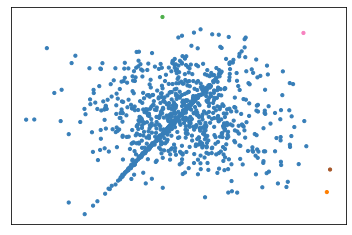

In [23]:
# single or minimum linkage
plot_hierarchical(X_no_cluster, n_clusters=5, method="single")

## Visualize Non-Spherical clustering results


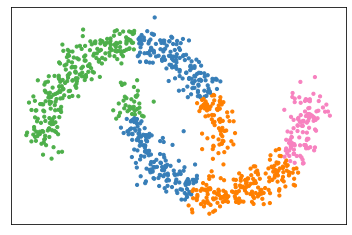

In [24]:
# complete or maximum linkage
plot_hierarchical(X_moon, n_clusters=4, method="complete")

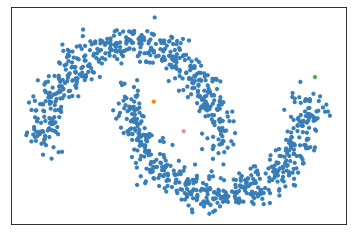

In [25]:
# single or minimum linkage
plot_hierarchical(X_moon, n_clusters=4, method="single")

## Visualize many clusters clustering results

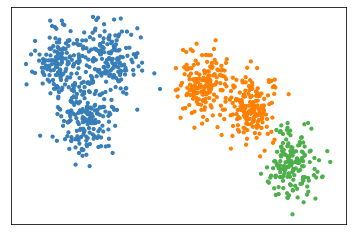

In [26]:
# complete or maximum linkage
plot_hierarchical(X_clusters, n_clusters=3, method="complete")

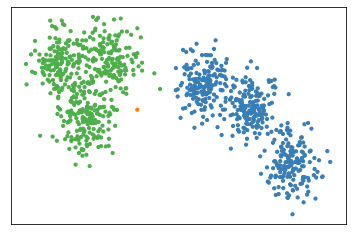

In [27]:
# single or minimum linkage
plot_hierarchical(X_clusters, n_clusters=3, method="single")

## Visualize different cluster sizes clustering results

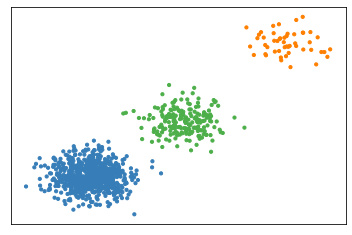

In [28]:
# complete or maximum linkage
plot_hierarchical(X_sizes, n_clusters=3, method="complete")

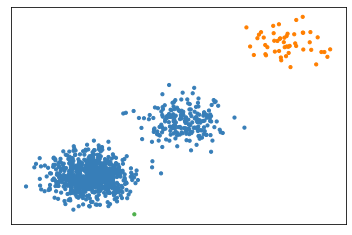

In [29]:
# single or minimum linkage
plot_hierarchical(X_sizes, n_clusters=3, method="single")

## Visualize different cluster densities clustering results

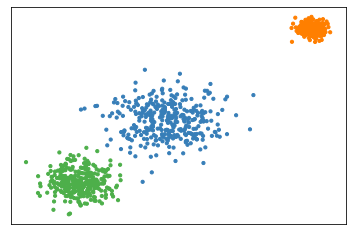

In [30]:
# complete or maximum linkage
plot_hierarchical(X_densities, n_clusters=3, method="complete")

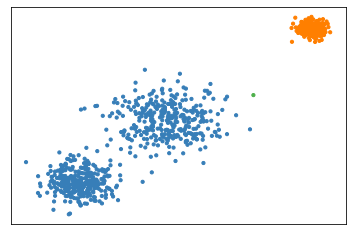

In [31]:
# single or minimum linkage
plot_hierarchical(X_densities, n_clusters=3, method="single")